In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
import numpy as np

# College Interest Prediction

## Executive Summary:

Our group tried to analyze different features within a dataset to identify which features influence interest levels to attend college. In our initial graphs of student’s grades against interest level(Cell 5) and interest level against if their parents went to college(cell 6), we were surprised to find no significant differences or major patterns in interest level. We investigated the data further, fitting it to KNN and Random Forest classifiers. When this initially wasn’t too accurate(Cell 15), we used “train_test_split” and “OneHotEncoder”(Cell 22) to improve our classifier’s accuracy, getting our most accurate score for the Random Forest Classifier at 55% accuracy(Cell 32). We also found that house area, average grades, parent salary, and parent age are most influential in predicting college interest (in order from highest to lowest in predictiveness)(Cell 35). Our interpretation of our data is to be cautious with our findings, as our dataset may not generalize to a bigger population, our accuracy scores weren’t too high, and there are a lot of other features not included in this dataset that also impact college interest.


## Introduction:


Part 1 & Part 3:


The central motivation for our project was to determine what factors may influence a high schooler’s interest in attending college. By using machine learning we were able to create a model to predict a students level of interest in attending (Not Interested, Less Interested, Uncertain, Interested, Very interested).


To predict the interest of students in attending college using the variables in the dataset, several Machine Learning tools can be used, such as KNN Classifier and Random Forest Classifier. The KNN Classifier can be trained on a labeled dataset, where the interest of students in attending college is the target variable. The KNN Classifier would be best for this data because it is a simple and effective algorithm for classification tasks, and can handle non-linear data relationships. It can also work well with small to medium-sized datasets, making it suitable for the dataset and can be split into training and testing sets to evaluate the performance of the algorithms and avoid overfitting. Another Machine Learning tool that can be used is Random Forest Classifier. This algorithm can handle large datasets with multiple features and can provide high accuracy in classification tasks. It works by building multiple decision trees and combining them to produce a more accurate prediction.


Since Machine Learning can be an iterative and experimental process, it is essential to build in fallback milestones in case the initial goals are not achieved. For example, if the initial model fails to produce satisfactory results, alternate analyses can be performed, such as clustering the students into sets based on their level of interest in attending college. This approach can help identify patterns and correlations within each cluster and may reveal groups of students with similar characteristics, such as grades, residence, school type, or parent salary.

In [3]:
# may have to change the file name to college.csv
df_college = pd.read_csv('college.csv')

In [4]:
df = pd.read_csv('college.csv')

## Data Description:


In order to gain more insight on if grades may impact a student’s level of interest, we created a histogram that showed the average grades and the percent of their frequency level. By using frequency instead of count number, we were able to compare the distributions of each spread better. We found that none of the graphs seemed to skew in a specific direction and overall, all had relatively normal distributions. This led us to the conclusion that average grades did not play a significant role in college interest levels.


The second chart we created was a bar chart that shows whether students’ parents of each category had attended college. By organizing the categories from least to most interested, there was still no clear pattern. The students that had the highest percentage of parents attending college were not interested while those who had the least were interested followed closely by less interested.

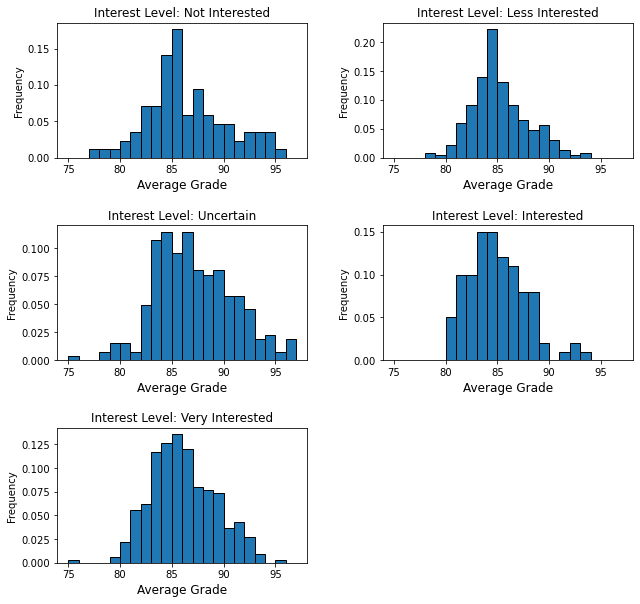

In [5]:
# extracting the needed columns and preparing it for histogram
interest = ['Not Interested', 'Less Interested', 'Uncertain', 'Interested','Very Interested' ]

# convert the 'interest' column to a categorical data type that has the specified order
df['interest'] = pd.Categorical(df['interest'], categories=interest, ordered=True)

# sets the number of bins the same for all
bins = np.arange(df['average_grades'].min(),df['average_grades'].max(),1)

# Creates and plots each histogram
histogram = df['average_grades'].hist(by = df['interest'], edgecolor = 'black', figsize = (10, 10), rot = 0, bins = bins, density = True)

# iterate over each interest level and set x-axis and y-axis labels and limits for the corresponding subplot
for i in range(len(interest)):
    
    subplot = histogram.flat[i]
    subplot.set_xlabel("Average Grade", size=12)
    subplot.set_ylabel("Frequency")
    #subplot.set_ylim(0, 60)
    subplot.set_title(f"Interest Level: {interest[i]}")

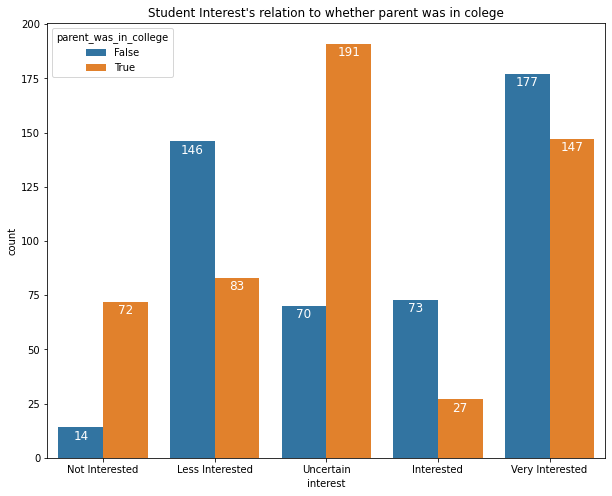

In [6]:
#plotting the data basd on 'parent_was_in_college' and counting their values.
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data=df, x='interest', hue='parent_was_in_college', ax = ax)
plt.title('Student Interest\'s relation to whether parent was in colege')

# Add the count labels to the bars
for bar in ax.patches:
    count = bar.get_height()
    ax.annotate(f'{count}', (bar.get_x()+.2, bar.get_height()-1), ha='center', va='top', color='white', size=12)
    
plt.show()

|                 	| Parent Didn't Attend College 	| Parent Attended College 	|
|-----------------	|------------------------------	|-------------------------	|
| Not Interested  	| 16%                          	| 84%                     	|
| Less Interested 	| 64%                          	| 36%                     	|
| Uncertain       	| 27%                          	| 73%                     	|
| Interested      	| 73%                          	| 27%                     	|
| Very Interested 	| 55%                          	| 45%                     	|

In [7]:
# Dropped this column as it was the dataset's own prediction
df_college = df_college.drop(columns = ['will_go_to_college'])
# change the string categories to floats
df_college = pd.get_dummies(df_college, columns=['type_school', 'school_accreditation', 'gender', 'residence', 'parent_was_in_college'])

In [8]:
df_college.head()

,interest,parent_age,parent_salary,house_area,average_grades,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,residence_Rural,residence_Urban,parent_was_in_college_False,parent_was_in_college_True
0,Less Interested,56,6950000,83.0,84.09,1,0,1,0,0,1,0,1,1,0
1,Less Interested,57,4410000,76.8,86.91,1,0,1,0,0,1,0,1,1,0
2,Very Interested,50,6500000,80.6,87.43,1,0,0,1,1,0,0,1,1,0
3,Very Interested,49,6600000,78.2,82.12,0,1,0,1,0,1,1,0,0,1
4,Very Interested,57,5250000,75.1,86.79,1,0,1,0,1,0,0,1,1,0


## Method:

We tried two different classifiers to analyze and predict different features that led to college interest. For each classifier, we dropped the column “will_go_to_college” and changed categorical variables into numbers to be able to compare each factor within the classifiers. Our next steps were to scale the data before testing the classifiers again. The first classifier we tried was a KNN classifier to predict college interest.

KNN classifiers find the nearest neighbors in the data (so the different data points that are most similar to each other). Once it does this, it can predict a target variable based on how the different data points relate to the target variable within the actual data. Knowing this, we could see if there is predictability between the different features within the data set and college interest, which also shows if there is a strong or weak relationship between them. Using this classifier, we could get closer to our goal by seeing if all of our different features are predictive of college interest. So while it doesn’t tell us which features are most influential, we would at least know if the data is predictive.

The second classifier that we used was a Random Forest classifier. We used this classifier both because the results of the KNN classifier weren’t as accurate as we hoped, but also to test if a different classifier found different results. Random Forest classification uses many decision trees from the given data to create the most accurate prediction possible. This could help us to possibly better predict which features influence college interest most. Additionally,  we knew that we could plot feature importance using a Random Forest classifier, which could help us see which features are most important when predicting college interest. Using this classifier, we would get our specific goal. The feature importance graph would let us know specifically which features most influence interest levels to attend college, while the classifier could again let us know how predictive the data is (and therefore how much stock we can put into the feature importance graph).

Results:

Before we implemented the one hot encoding tactic, our results in terms of accuracy of the models and their feature importances were very low. For KNN, the accuracy was .46 and for Decision Tree, the accuracy was .49. The feature importances graph seemed to fail to understand which columns were relevant. However, after implementing the OneHotEncoding to scale our data, we were able to see some improvements. The accuracy for randome forest technique was 55% and the feature importances seemed to show the influenctial columns, which were house_area, parent_salary, and average_grades.


### Code to scale data (change based on categories that need scaling)

In [9]:
# create a new scaled DataFrame
df_college_scaled = pd.DataFrame()
# for each feature in each column...
for feat in df_college.columns:
    # scale each feature (besides Class) by the standard deviation
    if feat != 'interest':
        df_college_scaled[f'{feat}_scaled'] = df_college[feat] / df_college[feat].std()
    elif feat == 'interest':
        df_college_scaled[f'{feat}_scaled'] = df_college[feat]
df_college_scaled.head()

,interest_scaled,parent_age_scaled,parent_salary_scaled,house_area_scaled,average_grades_scaled,type_school_Academic_scaled,type_school_Vocational_scaled,school_accreditation_A_scaled,school_accreditation_B_scaled,gender_Female_scaled,gender_Male_scaled,residence_Rural_scaled,residence_Urban_scaled,parent_was_in_college_False_scaled,parent_was_in_college_True_scaled
0,Less Interested,15.998048,4.973003,5.427197,24.887988,2.048263,0.000000,2.000445,0.000000,0.0000,1.9999,0.000000,2.005109,2.000601,0.000000
1,Less Interested,16.283728,3.155531,5.021792,25.722619,2.048263,0.000000,2.000445,0.000000,0.0000,1.9999,0.000000,2.005109,2.000601,0.000000
2,Very Interested,14.283972,4.651010,5.270266,25.876522,2.048263,0.000000,0.000000,2.000445,1.9999,0.0000,0.000000,2.005109,2.000601,0.000000
3,Very Interested,13.998292,4.722564,5.113335,24.304930,0.000000,2.048263,0.000000,2.000445,0.0000,1.9999,2.005109,0.000000,0.000000,2.000601
4,Very Interested,16.283728,3.756585,4.910632,25.687103,2.048263,0.000000,2.000445,0.000000,1.9999,0.0000,0.000000,2.005109,2.000601,0.000000


### Code to build the KNN classifier (with KFolds)

In [10]:
# import the KNeighbors Classifier, copy (given in class), and Kfolds
from sklearn.neighbors import KNeighborsClassifier
from copy import copy
from sklearn.model_selection import KFold

# create an empty list of x-features
x_feat_list = []
# for loop to add each feature (from the scaled DataFrame) into the empty list
for feat in df_college_scaled.columns:
    # if statement to make sure it's only added once
    if feat not in x_feat_list:
        # if statement to make sure Class_scaled isn't added as a feature
        if feat != 'interest_scaled':
            x_feat_list.append(feat)

# set k equal to 21, and the y_feature to Class_scaled
k = 21
y_feat = 'interest_scaled'

# create matrices for the features and the true Class (or Class_scaled) values
x = df_college_scaled.loc[:, x_feat_list].values
y_true = df_college_scaled.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", modify the internal state of knn_classifier
knn_classifier.fit(x, y_true)

# construction of kfold object
kfold = KFold(n_splits=8, shuffle=True)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

# for loop for each index in the kfold
for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train and test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each bean's species
    y_pred[test_idx] = knn_classifier.predict(x_test)

### Code to build the confusion matrix

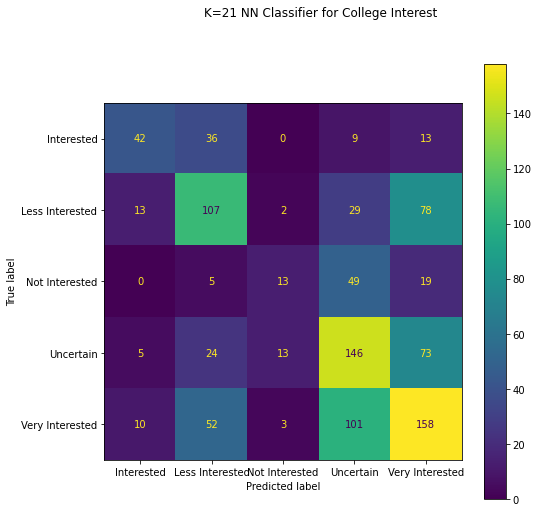

In [11]:
# imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# create the confusion matrix, comparing the predicted bean with the true bean from the data
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

# plot the confusion matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()
plt.suptitle('K=21 NN Classifier for College Interest')
plt.gcf().set_size_inches(8, 8)
plt.grid(False)

In [12]:
# import for accuracy score
from sklearn.metrics import accuracy_score

# compute the accuracy score, comparing y to the predicted y
accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

0.466

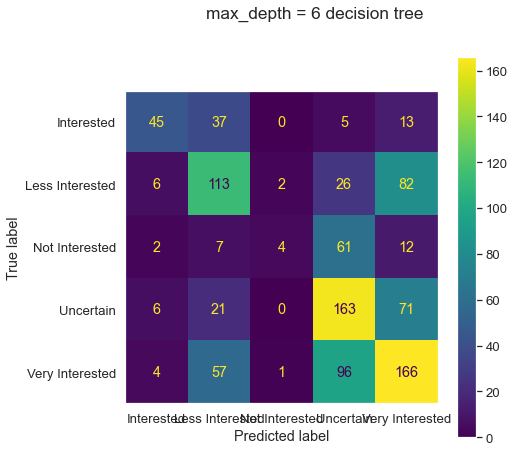

In [42]:
# imports
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# create a list of features
x_feat_list = []
# for loop to add each feature (from the scaled DataFrame) into the empty list
for feat in df_college_scaled.columns:
    # if statement to make sure it's only added once
    if feat not in x_feat_list:
        # if statement to make sure Class_scaled isn't added as a feature
        if feat != 'interest_scaled':
            x_feat_list.append(feat)

# extract data from dataframe
x = df_college_scaled.loc[:, x_feat_list].values
y = df_college_scaled.loc[:, 'interest_scaled'].values

# set the folds at 10 and max_depth as 3
n_splits = 10
max_depth = 6

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# build decision tree classifier
dec_tree_clf = RandomForestClassifier(max_depth=max_depth)

# establish the predicted y as an empty array
y_pred = np.empty_like(y)

# predict the price_bucket categories
for train_idx, test_idx in skfold.split(x, y):
    # set up the training indexes for x and y
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # set up the test index for x
    x_test = x[test_idx, :]
    
    # fit a decision tree classifier for the training x and y
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # the actual prediction of the categories using the test index of x
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

# plot the confusion matrix
sns.set(font_scale=1.2)
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))
conf_mat_disp.plot()
plt.suptitle('max_depth = 6 decision tree')
plt.gcf().set_size_inches(7, 7)
plt.grid(False)

In [44]:
# import for accuracy score
from sklearn.metrics import accuracy_score

# compute the accuracy score, comparing y to the predicted y
accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

0.491

In [15]:
# import plot_feat_import()
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

In [16]:
# extract data from dataframe
x = df_college_scaled.loc[:, x_feat_list].values
y = df_college_scaled.loc[:, 'interest_scaled'].values

# create and fit a RandomForestClassifier to x and y (the variables testing and the targeted variables)
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x, y)

RandomForestClassifier()

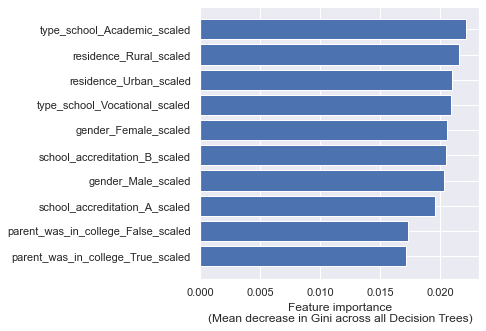

In [17]:
# plot the mean decrease in Gini across the decision trees
sns.set()
plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit=10)

In [18]:
# Running all the codes again with different encoding
df_college = pd.read_csv('college.csv')

In [19]:
features = ['type_school',
 'school_accreditation',
 'gender',
 'residence',
 'parent_age',
 'parent_salary',
 'house_area',
 'average_grades',
 'parent_was_in_college']

In [20]:
# Dropped this column as it was the dataset's own prediction
df_college = df_college.drop(columns = ['will_go_to_college'])

In [21]:
X = df_college[features]
y = df_college['interest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [22]:
encoder1 = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder2 = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder3 = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder4 = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder5 = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder1.fit(X_train[['gender']])
encoder2.fit(X_train[['type_school']])
encoder3.fit(X_train[['residence']])
encoder4.fit(X_train[['school_accreditation']])
encoder5.fit(X_train[['parent_was_in_college']])

X_train['gender'] = encoder1.transform(X_train[['gender']])
X_train['type_school'] = encoder2.transform(X_train[['type_school']])
X_train['residence'] = encoder3.transform(X_train[['residence']])
X_train['school_accreditation'] = encoder4.transform(X_train[['school_accreditation']])
X_train['parent_was_in_college'] = encoder5.transform(X_train[['parent_was_in_college']])

X_test['gender'] = encoder1.transform(X_test[['gender']])
X_test['type_school'] = encoder2.transform(X_test[['type_school']])
X_test['residence'] = encoder3.transform(X_test[['residence']])
X_test['school_accreditation'] = encoder4.transform(X_test[['school_accreditation']])
X_test['parent_was_in_college'] = encoder5.transform(X_test[['parent_was_in_college']])

In [23]:
numericFeatures = ['parent_age', 'parent_salary', 'house_area', 'average_grades']
scaler = StandardScaler()
scaler.fit(X_train[numericFeatures])

X_train[numericFeatures] = scaler.transform(X_train[numericFeatures]) #scale the training data

X_test[numericFeatures] = scaler.transform(X_test[numericFeatures]) #scale the training data

In [24]:
list = []

for i in range(1, 23, 2) :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #mse = mean_squared_error(y_test, y_pred)
    score = knn.score(X_test, y_test)
    list.append(score)
    print("k = " + str(i))
    #print("The mean squared error is {}".format(round(mse, 2)))
    print(score)

k = 1
0.43666666666666665
k = 3
0.44666666666666666
k = 5
0.48333333333333334
k = 7
0.4666666666666667
k = 9
0.4633333333333333
k = 11
0.48
k = 13
0.4633333333333333
k = 15
0.47333333333333333
k = 17
0.49666666666666665
k = 19
0.48
k = 21
0.49333333333333335


In [25]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.49666666666666665

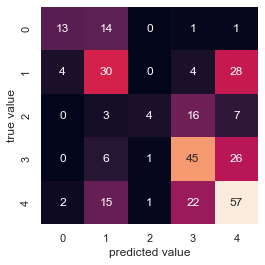

In [27]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred2)

0.4666666666666667

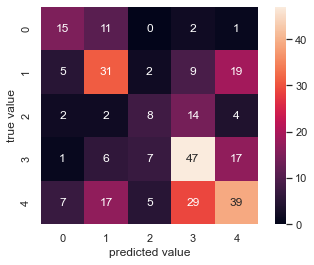

In [30]:
mat2 = confusion_matrix(y_test, y_pred2)

sns.heatmap(mat2, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [31]:
for i in range(1, 100, 20):
    rf = RandomForestClassifier(n_estimators=i, random_state=7)
    rf.fit(X_train, y_train)
    y_pred3   = rf.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred3)

0.5466666666666666

In [33]:
rf.feature_importances_

array([0.04549754, 0.03335178, 0.03991871, 0.03972203, 0.13533717,
       0.21223348, 0.23715092, 0.22205974, 0.03472863])

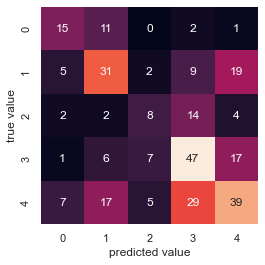

In [34]:
mat3 = confusion_matrix(y_test, y_pred3)

sns.heatmap(mat2, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

<BarContainer object of 9 artists>

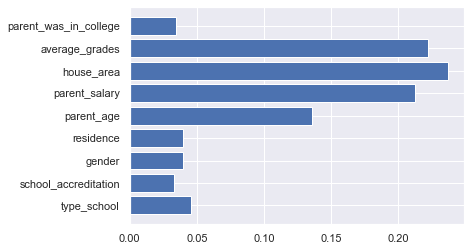

In [35]:
plt.barh(features, rf.feature_importances_)

## Discussion:

### Interpretation:

The accuracy score of 55% for the random forest and KNN classifiers is not particularly ground-breaking, but it is also not unexpected given the complexity of predicting human behavior. It is also not surprising that the features with the highest predictive power are grades, house area, parent salary, and parent age, as these are all known factors that can influence a student's decision to attend college. However, it is important to note that the accuracy score and the most predictive features may not necessarily generalize to other datasets or populations. It is also possible that there may be other variables that were not included in the dataset that could have a significant impact on a student's interest in attending college. Therefore, it is important to approach these results with caution and consider potential biases or methodological issues.

### Takeaway:

Based on the results of the analysis, one possible action could be to use the predictive model to identify high school students who are at risk of not being interested in attending college and provide them with targeted interventions or resources to increase their interest and likelihood of attending. However, it is important to consider the potential ethical implications of using this information to target specific students and ensure that any interventions are evidence-based and effective. Before taking any action, it is important to answer questions such as:

How accurate is the predictive model in identifying students who are at risk of not being interested in attending college? Are the interventions being considered effective in increasing students' interest in attending college? Are there any unintended consequences or negative impacts of targeting specific students based on their predicted likelihood of attending college?

### Ethical Implications:

One of the most salient ethical implications of this project is the potential for the model to perpetuate and amplify existing inequalities and biases. For example, if the model is based on historical data that reflects systemic inequities in access to educational resources or economic opportunities, it may reinforce these inequities by predicting that certain students are less likely to be interested in attending college. Additionally, if the model is used to target specific students for interventions, there is a risk of stigmatizing or unfairly labeling certain students based on their predicted likelihood of attending college.